In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('filtered_sets/only_nading_matchups.csv')

#df = pd.read_csv('filtered_sets/player_averages.csv')
name = np.array(['Free_Throw%', 'Field_Goal%', '2pt', '3pt'])#, 'Iso', 'Pick', 'Post', 'Offball', 'AT_Ratio', 'TT_ratio'])#, 'TP_Ratio', 'SQavg'])
top = np.array(['ft_player', 'fg', 'empty', 'fg3'])#, 'iso_pts', 'pick_pts', 'post_pts', 'offBall_pts', 'tov', 'tov'])#, 'tov', 'qsq'])
bottom = np.array(['fta', 'fga', 'empty', 'fga3'])#, 'iso_actions', 'pick_actions', 'post_actions', 'offBall_actions', 'assistOppCreated', 'touches'])#, 'poss', 'poss'])

In [2]:
def create_stats_column(df, i, top=top, bottom=bottom, multi_var=False):
    top = top[i]
    bottom = bottom[i]
    row = np.zeros(0, dtype=float)
    for j in range(np.shape(df)[0]):
        if(multi_var):
            #print('2pt%' if name[i] != '2pt%' else 'multi')
            num = df['fg'].iloc[j] - df['fg3'].iloc[j]
            denom = df['fga'].iloc[j] - df['fga3'].iloc[j]
            result = num/denom
        else:
            result = df[f'{top}'].iloc[j]/df[f'{bottom}'].iloc[j]
        row = np.append(row, [result])
    return row

def update_df(df, top=top, bottom=bottom):
    for i in range(len(name)):
        name_temp = name[i]
        #print(name_temp, name[i])
        data = pd.DataFrame({f'{name_temp}': create_stats_column(df, i, top, bottom, multi_var=(True if name[i] == '2pt' else False))})
        df = pd.concat([df, data], axis=1)
    print(np.shape(df))
    return df

In [14]:
nd = update_df(df.copy())
nd3pt = nd[nd['3pt'] > 0.01]

nd2pt = nd[nd['2pt'] > 0.01]
nd2pt = nd2pt[nd2pt['fta'] > 0.01]

nd_tt_2pt_miss = nd[nd['2pt'] < 0.1]
nd_tt_2pt_bskt = nd[nd['2pt'] > 0.1]
nd_tt_3pt_miss = nd[nd['3pt'] < 0.1]
nd_tt_3pt_bskt = nd[nd['3pt'] > 0.1]

#df[['player_defMatchup_a', 'player_defMatchup_ht', 'Free_Throw%', '2pt%', '3pt%']].head(30)

(1669, 35)


C:\Users\thund\AppData\Local\Temp\ipykernel_27504\3412317885.py:12: RuntimeWarning: invalid value encountered in scalar divide
  result = df[f'{top}'].iloc[j]/df[f'{bottom}'].iloc[j]
C:\Users\thund\AppData\Local\Temp\ipykernel_27504\3412317885.py:10: RuntimeWarning: invalid value encountered in scalar divide
  result = num/denom
C:\Users\thund\AppData\Local\Temp\ipykernel_27504\3412317885.py:12: RuntimeWarning: invalid value encountered in scalar divide
  result = df[f'{top}'].iloc[j]/df[f'{bottom}'].iloc[j]


In [27]:
nd2pt[['player_defMatchup_a', 'player_defMatchup_ht', 'ptsScored_team', 'Free_Throw%', 'ft_player', 'fta', 'fg', 'fga','2pt', '3pt', 'touches_time']].head(1)

,player_defMatchup_a,player_defMatchup_ht,ptsScored_team,Free_Throw%,ft_player,fta,fg,fga,2pt,3pt,touches_time
10,"House, Brandyn",76,3,0.5,1.0,2.0,1.0,1.0,1.0,NaN,4.293333


In [35]:
#nd3pt[['player_defMatchup_a', 'player_defMatchup_ht', 'Free_Throw%', '2pt%', '3pt%']].head()

In [15]:
nd_tt_2pt_miss = nd_tt_2pt_miss.reset_index(drop=True).reset_index()
nd_tt_3pt_miss = nd_tt_3pt_miss.reset_index(drop=True).reset_index()
nd_tt_2pt_bskt = nd_tt_2pt_bskt.reset_index(drop=True).reset_index()
nd_tt_3pt_bskt = nd_tt_3pt_bskt.reset_index(drop=True).reset_index()

length = len(np.array(nd_tt_2pt_miss))
x1 = np.pad(nd_tt_2pt_miss[['index']], (0, 0))
y1 = np.pad(nd_tt_2pt_miss[['touches_time']], (0, 0))

print(np.shape(x1), np.shape(y1))


length = len(np.array(nd_tt_2pt_bskt))
x2 = np.pad(nd_tt_2pt_bskt[['index']], (0, 0))
y2 = np.pad(nd_tt_2pt_bskt[['touches_time']], (0, 0))
x2 = np.add(x2, np.full((length, 1), len(np.array(nd_tt_2pt_miss))))

print(np.shape(x2), np.shape(y2))

length = len(np.array(nd_tt_3pt_miss))
x3 = np.pad(nd_tt_3pt_miss[['index']], (0, 0))
y3 = np.pad(nd_tt_3pt_miss[['touches_time']], (0, 0))
x3 = np.add(x3, np.full((length, 1), len(np.array(nd_tt_2pt_miss)) + len(np.array(nd_tt_2pt_bskt))))

print(np.shape(x3), np.shape(y3))

length = len(np.array(nd_tt_3pt_bskt))
x4 = np.pad(nd_tt_3pt_bskt[['index']], (0, 0))
y4 = np.pad(nd_tt_3pt_bskt[['touches_time']], (0, 0))
x4 = np.add(x4, np.full((length, 1), len(np.array(nd_tt_2pt_miss)) + len(np.array(nd_tt_2pt_bskt)) + len(np.array(nd_tt_3pt_miss))))

print(np.shape(x4), np.shape(y4))

(130, 1) (130, 1)
(189, 1) (189, 1)
(120, 1) (120, 1)
(54, 1) (54, 1)


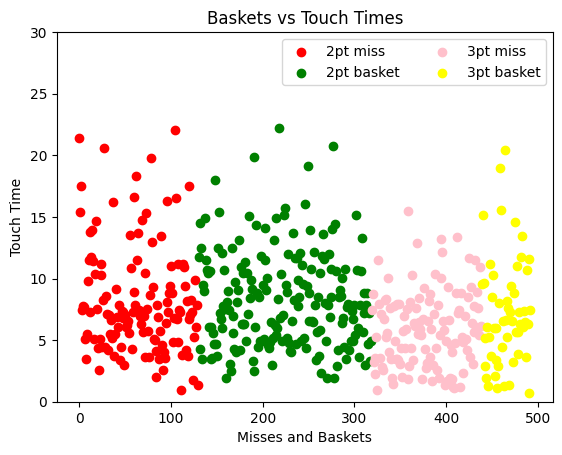

In [22]:
plt.scatter(x1, y1, color = 'red', label = "2pt miss")
plt.scatter(x2, y2, color = 'green', label = "2pt basket")
plt.scatter(x3, y3, color = 'pink', label = "3pt miss")
plt.scatter(x4, y4, color = 'yellow', label = "3pt basket")

# Set x and y axes labels
plt.xlabel('Misses and Baskets')
plt.ylabel('Touch Time')

plt.title('Baskets vs Touch Times')
plt.ylim(0, 30)
plt.legend(ncols=2)
plt.show()